<a href="https://colab.research.google.com/github/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Numpy is used for working with matrices
import numpy as np
# Matplotlib is used for plotting graphs
import matplotlib.pyplot as plt

In [2]:
# For 3d plotting
from mpl_toolkits import mplot3d

---
# Getting started with numpy

Numpy is used for working with matrices and linear algebra in python. First, lets take a look at creating some matrices

In [3]:
# Creating numpy arrays
print("Zeroes")
print(np.zeros((2, 3)))             # Create a matrix full of zeroes  

print("Ones")
print(np.ones((2, 3)))              # Create a matrix full of ones  

print("Identity")
print(np.eye(5))                    # Create 5 * 5 a identity matrix

print("From list")
print(np.asarray([[1, 2], [3, 4]])) # Create a matrix from a list

print("In a range")
print(np.arange(0, 100, 10))        # From 0(incl) to 100(excl) with difference 10

Zeroes
[[0. 0. 0.]
 [0. 0. 0.]]
Ones
[[1. 1. 1.]
 [1. 1. 1.]]
Identity
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
From list
[[1 2]
 [3 4]]
In a range
[ 0 10 20 30 40 50 60 70 80 90]


In [4]:
# Array slicing
a = np.random.randn(3,5)
print(a)
print((a[1:3, 2:5]))

[[ 0.55995995  0.04624075 -0.26133029 -0.79249944 -0.20056552]
 [ 0.85819474 -2.3276921   1.62623134  0.27696035 -0.95178119]
 [-0.15781426  0.58892906  0.67121558 -0.50394455 -0.47167399]]
[[ 1.62623134  0.27696035 -0.95178119]
 [ 0.67121558 -0.50394455 -0.47167399]]


---
# Linear Regression

Linear regression means fitting a straight line (in 2D) or hyperplane (in higher dimensions) to best fit some data, to be used for predicting outputs for future unknown inputs. 

The most common metric used to measure how well good the prediction is, is mean square error, which means minimizing the euclidean position error between the prediction and the actual datapoint.

In [157]:
# Generate input and output
start = 0                           # Start, End and no of input samples
end   = 100
size  = 100

var   = 0.05

m = 5                               # Slope of actual line
b = -10                             # Intercept of actual line

np.random.seed(0)                   # Seed to get same value for testing (Comment later)
x = np.linspace(start, end, size)   # Generate inputs

# Generate outputs
y = m * (x + (end-start) * var * np.random.randn(size)) + b

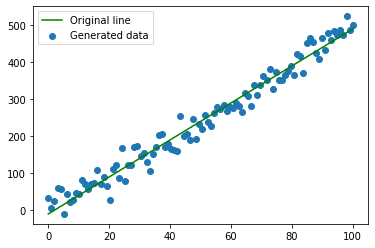

In [158]:
# Plot points using the scatter function
plt.scatter(x, y, label="Generated data")
# Plot a line using plot function
plt.plot(x, m*x + b, 'g', label="Original line")
plt.legend()
plt.show()

This is the plot of the data we have generated. We have generated it from a linear equation with some additional noise.

It is not possible to create a line that goes through all these points at the same time. So, we find the line that has the least Mean Square Error (MSE) possible.

The line is defined by 2 parameters, its slope and intercept. Here, we try to find the mean square error of a given line (passed as slope - m and intercept - b) from the actual data.

In [159]:
# These functions are for visualizing the error v/s parameters
def find_error_mat(m_test, b_test):
  x_copy = x.copy().reshape(1, 1, x.shape[0])
  x_copy = np.tile(x_copy, (m_test.shape[0], m_test.shape[1], 1))

  y_copy = y.copy().reshape(1, 1, y.shape[0])
  y_copy = np.tile(y_copy, (m_test.shape[0], m_test.shape[1], 1))

  m_copy = np.tile(m_test.reshape(m_test.shape[0], m_test.shape[1], 1), (1, 1, x.shape[0]))
  b_copy = np.tile(b_test.reshape(b_test.shape[0], b_test.shape[1], 1), (1, 1, x.shape[0]))
  
  y_pred = m_copy * x_copy + b_copy
  return np.average(np.square(y_copy - y_pred), axis=2)

def vis_errors(m_pred, b_pred, error, single_pt = False):
  m_start = 0
  m_end   = 2*m
  m_arr   = np.linspace(m_start, m_end, 10)

  b_start = 0
  b_end   = 2*b
  b_arr   = np.linspace(b_start, b_end, 10)

  X, Y = np.meshgrid(m_arr, b_arr)

  Z = find_error_mat(X, Y)

  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.plot_wireframe(X, Y, Z)
  
  ax.scatter3D(m_pred, b_pred, error, color='r', s=100)
  if(not single_pt):
    ax.plot3D(m_pred, b_pred, error, color='g')
  
  ax.view_init(30, 85)
  ax.set_xlabel('Slope')
  ax.set_ylabel('Intercept')
  ax.set_zlabel('Error')
  plt.show()

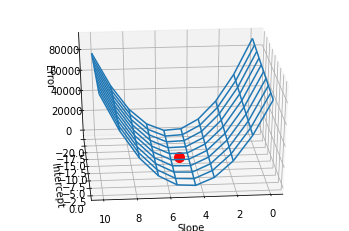

In [163]:
def find_error(m_test, b_test):
  y_pred = m_test * x + b_test
  return np.average(np.square(y - y_pred))

# Plot the slope and intercept v/s error
vis_errors(m, b, find_error(m, b), True)

 Initial slope : 18.832, Initial intercept : -13.478


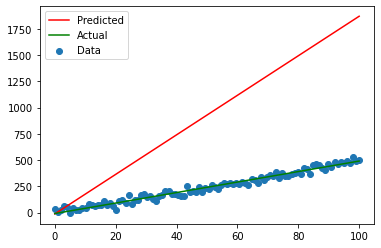

 Error 636452.318 
 Predicted slope : -4.2447, Predicted offset : -13.8209


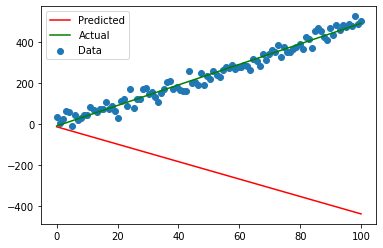

 Error 290730.239 
 Predicted slope : 11.3423, Predicted offset : -13.5871


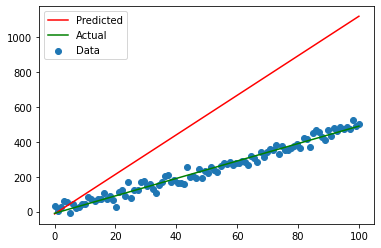

 Error 132997.100 
 Predicted slope : 0.8139, Predicted offset : -13.7431


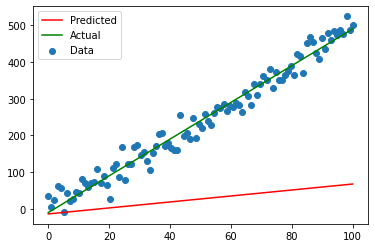

 Error 61032.521 
 Predicted slope : 7.9253, Predicted offset : -13.6359


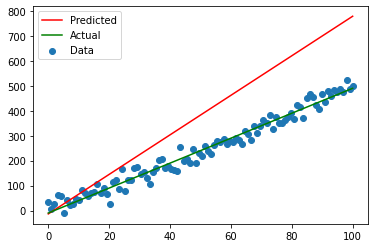

 Error 28199.213 
 Predicted slope : 3.1218, Predicted offset : -13.7064


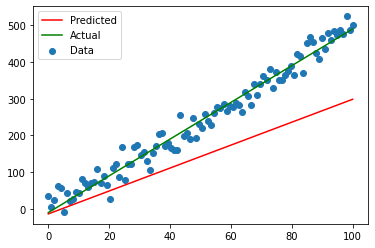

 Error 13219.256 
 Predicted slope : 6.3664, Predicted offset : -13.6569


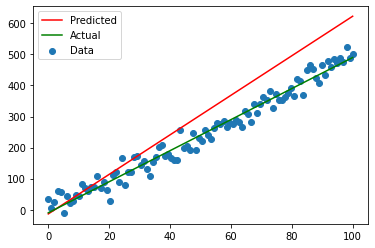

 Error 6384.759 
 Predicted slope : 4.1748, Predicted offset : -13.6885


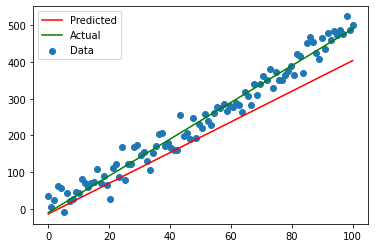

 Error 3266.568 
 Predicted slope : 5.6551, Predicted offset : -13.6652


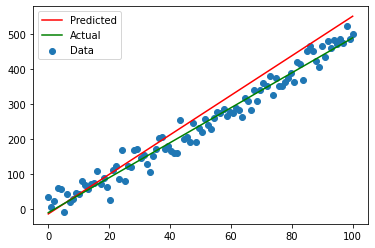

 Error 1843.913 
 Predicted slope : 4.6552, Predicted offset : -13.6790


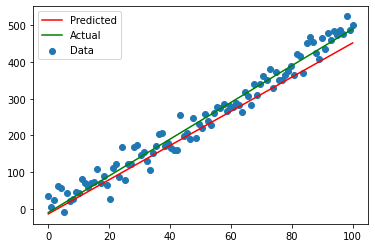

 Error 1194.835 
 Predicted slope : 5.3305, Predicted offset : -13.6678


In [161]:
m_pred = 10* np.random.randn()
b_pred = 10* np.random.randn()
 
print(" Initial slope : %.3f, Initial intercept : %.3f"%(m_pred, b_pred))
 
num_iter = 10
 
# Overshoot
learning_rate = 2.5e-4
 
# Good value
# learning_rate = 1e-4

m_hist = []
b_hist = []
error_hist = []
 
for i in range(num_iter):
  y_pred = (x * m_pred) + b_pred
 
  plt.plot(x, y_pred, 'r', label='Predicted')
  plt.plot(x, m*x + b, 'g', label='Actual')
  plt.scatter(x, y, label='Data')
  plt.legend()
  plt.show()
 
  # Error
  error = np.average(np.square(y_pred - y))
  print(" Error %.3f "%(error))
 
  # Derivative of error with respect to y
  d_y = 2 * (y_pred - y)
 
  # Derivative of error with respect to slope
  d_m = d_y * x
  # Derivative of error with respect to intercept
  d_b = d_y

  # Append to history to visualize later
  m_hist.append(m_pred)
  b_hist.append(b_pred)
  error_hist.append(error)
  
  # Update predictions by gradient descept rule
  m_pred = m_pred - learning_rate * np.average(d_m)
  b_pred = b_pred - learning_rate * np.average(d_b)
 
 
  print(" Predicted slope : %.4f, Predicted offset : %.4f"%(m_pred, b_pred))

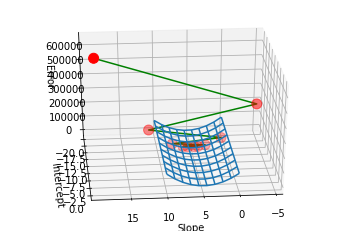

In [162]:
vis_errors(m_hist, b_hist, error_hist, False)

### Note
You might be wondering "Why go through all this trouble when you have already plotted the graph"! And you are right! This is quite unnecessary in our case. However, it might not be possible to find the error for all inputs and find the one with the mininum for problems with larger number of dimensions. Neural networks nowadays could have millions of parameters! 

When we need to optimize a value with so many parameters to tweak is when we use gradient descent!

---
# Additional Challenge!

Here, we have just 1 dimensional input. Try implementing the same for inputs with 10 dimensions!